In [1]:
pwd

'/mmfs1/data/aglinska/BC-fMRI-AE/Notebooks'

In [2]:
import numpy as np
import pandas as pd
import ants 
import os
from matplotlib import pyplot as plt
from tqdm import tqdm

In [3]:
indir = '../../data/ABIDE/Derivatives/cpac_nofilt_global/'
subs  = [file for file in os.listdir(indir) if file.startswith('sub-')]
subs.sort()

print(len(subs))
subs[0:10]

1102


['sub-CMUa0050642',
 'sub-CMUa0050646',
 'sub-CMUa0050647',
 'sub-CMUa0050649',
 'sub-CMUa0050653',
 'sub-CMUa0050654',
 'sub-CMUa0050656',
 'sub-CMUa0050659',
 'sub-CMUa0050660',
 'sub-CMUa0050663']

In [4]:
df = pd.read_csv('../Data/ABIDE_df2.csv')

In [5]:
#epi_rois = ants.image_read('../Data/YeoAtlas/epi_rois.nii.gz')
epi_rois = ants.image_read('../Data/GlasserAtlas/epi_rois.nii.gz')

In [6]:
s = 10
sub = subs[s];print(sub)

sub-CMUa0050664


In [94]:
#ants.slice_image(epi,axis=3,idx=0).plot_ortho(flat=True,xyz_lines=False,orient_labels=False)

In [9]:
if not os.path.exists(ofdir):
    os.mkdir(ofdir)

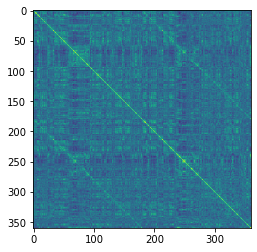

In [117]:
rois = epi_rois.numpy().reshape(-1)
nrois = int(epi_rois.numpy().max())

sub = subs[0]
fn = os.path.join(indir,sub,'ses-1','func',f'{sub}_ses-1_preproc.nii.gz')
ofn = os.path.join(ofdir,sub+'.npy')
epi = ants.image_read(fn)
epi_mat = epi.numpy().reshape(-1,epi.shape[-1])
roi_mat = np.array([epi_mat[rois==i,:].mean(axis=0) for i in range(1,nrois+1)])
cmat = np.corrcoef(roi_mat)
plt.imshow(cmat)

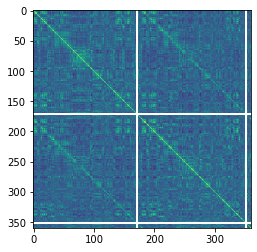

In [111]:
rois = epi_rois.numpy().reshape(-1)
nrois = int(epi_rois.numpy().max())

sub = subs[s]
fn = os.path.join(indir,sub,'ses-1','func',f'{sub}_ses-1_preproc.nii.gz')
ofn = os.path.join(ofdir,sub+'.npy')
epi = ants.image_read(fn)
epi_mat = epi.numpy().reshape(-1,epi.shape[-1])
roi_mat = np.array([epi_mat[rois==i,:].mean(axis=0) for i in range(1,nrois+1)])
cmat = np.corrcoef(roi_mat)
plt.imshow(cmat)

In [97]:
np.nonzero(np.isnan(cmat).sum(axis=0)>2)[0]+1

array([172, 352])

In [99]:
rois = epi_rois.copy()

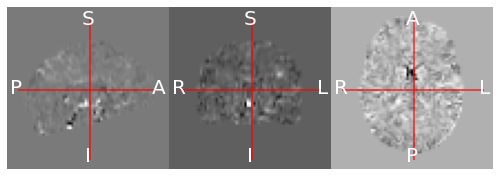

In [108]:
rois[rois.numpy() != 172]=0
epi3d.plot_ortho(rois,flat=True)

In [110]:
rois = epi_rois.numpy().reshape(-1)
nrois = int(epi_rois.numpy().max())
ofdir = '../Assets/abide_1_cmats_g'
for s in tqdm(range(5,len(subs))):
    sub = subs[s]
    fn = os.path.join(indir,sub,'ses-1','func',f'{sub}_ses-1_preproc.nii.gz')
    ofn = os.path.join(ofdir,sub+'.npy')
    
    if not os.path.exists(ofn):    
        epi = ants.image_read(fn)
        epi_mat = epi.numpy().reshape(-1,epi.shape[-1])

        assert np.isnan(epi_mat).sum()==0, 'nans'

        roi_mat = np.array([epi_mat[rois==i,:].mean(axis=0) for i in range(1,nrois)])
        
        assert np.isnan(roi_mat).sum()==0, 'nans'
        
        cmat = np.corrcoef(roi_mat)
        
        assert np.isnan(cmat).sum()==0, 'nans'
        
        np.save(file=ofn,arr=cmat)

  1%|          | 9/1097 [00:30<1:00:56,  3.36s/it]/data/aglinska/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning:

invalid value encountered in true_divide

/data/aglinska/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning:

invalid value encountered in true_divide

  1%|          | 9/1097 [00:34<1:09:45,  3.85s/it]


AssertionError: nans

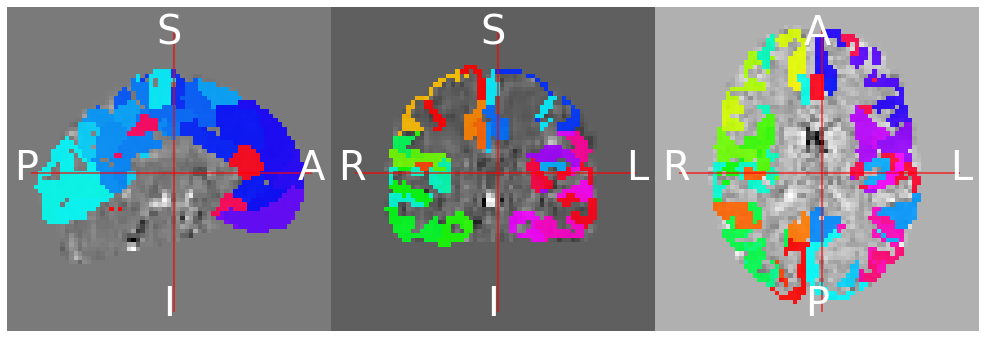

In [107]:
epi3d = ants.slice_image(epi,axis=3,idx=0)
epi3d.plot_ortho(epi_rois,flat=True,figsize=2,overlay_cmap='hsv')

In [41]:
#ofdir = '../Assets/abide_1_cmats'
cmat_files = os.listdir(ofdir)
cmats = np.array([np.load(os.path.join(ofdir,cmat_file)) for cmat_file in cmat_files])

In [38]:
has_nans = np.array([np.isnan(cmats[i,:,:]).sum()==0 for i in range(cmats.shape[0])])
has_nans.sum()

1033

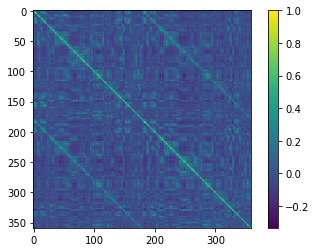

In [73]:
#plt.imshow(cmats.mean(axis=0))
plt.imshow(np.nanmean(cmats,axis=0))
plt.colorbar()

In [64]:
from helper_funcs import *

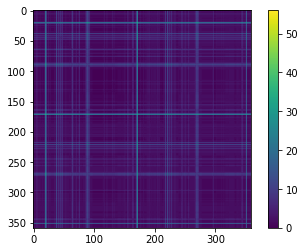

In [119]:
#plt.figure(10,10)
plt.imshow(np.isnan(cmats).sum(axis=0))
plt.colorbar()

In [84]:
#np.savez_compressed('../Assets/cmats_glasser',cmat=cmats,subs=subs)